In [48]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import pickle
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [49]:
# This notebook shows me going through each feature and checking if the residuals are normal.

with open("initial_df.pkl", 'rb') as picklefile: 
    df = pickle.load(picklefile)


In [50]:
df.describe()

,education_exp,gdp_per_capita,internet_users,pop_below_pov,population,public_debt,unemp_rate,urbanization,agr,ind,border_internet_scaled,total_trade,total_tel
count,148.000000,148.000000,148.000000,148.000000,1.480000e+02,148.000000,148.000000,148.000000,148.000000,148.000000,1.480000e+02,148.000000,1.480000e+02
mean,4.887162,20832.432432,0.516328,25.114118,3.594151e+07,57.086486,10.614865,59.538514,11.007432,27.106757,4.877504e-01,10416.410434,1.142238e+00
std,1.800388,21434.739481,0.270613,16.546580,1.139644e+08,31.849409,10.740016,23.025577,10.969110,10.386455,2.386971e-01,19553.217667,5.825333e-01
min,1.100000,1200.000000,0.041865,0.000000,1.708700e+04,0.000000,0.300000,16.400000,0.000000,4.800000,8.507587e-07,175.159249,5.980065e-07
25%,3.600000,5225.000000,0.259172,14.275000,2.682152e+06,36.200000,4.400000,40.550000,2.675000,20.175000,2.815654e-01,1224.802464,7.962782e-01
50%,4.750000,12750.000000,0.527990,21.800000,9.700296e+06,52.650000,6.950000,60.200000,7.500000,26.400000,5.212311e-01,3111.016759,1.243463e+00
75%,5.725000,29500.000000,0.757902,32.250000,2.932878e+07,71.325000,11.725000,77.825000,15.425000,33.025000,6.972638e-01,11645.589931,1.517760e+00
max,12.500000,124500.000000,0.971214,82.500000,1.281936e+09,236.400000,77.000000,100.000000,60.700000,61.400000,9.459491e-01,146770.431716,3.143597e+00


In [51]:
df = df.dropna()
df_train,df_test = train_test_split(df, test_size=0.2, random_state = 1)
df_train.head()


,education_exp,gdp_per_capita,internet_users,pop_below_pov,population,public_debt,unemp_rate,urbanization,agr,ind,border_internet_scaled,total_trade,total_tel
Country,,,,,,,,,,,,,
Switzerland,5.1,61400.0,0.887867,6.6,8236303.0,42.8,3.0,73.8,0.7,25.6,0.800442,75701.440319,0.445893
Niger,6.0,1200.0,0.041865,45.4,19245344.0,46.5,2.6,16.4,41.5,18.1,0.243596,175.159249,0.462098
Egypt,3.8,12700.0,0.382545,27.8,97041072.0,103.3,11.9,42.7,11.9,33.1,0.335194,788.841244,1.129038
Turkmenistan,3.0,18100.0,0.177887,0.2,5351277.0,28.8,11.0,51.6,7.5,44.9,0.191081,2278.895299,0.124271
Canada,5.3,48300.0,0.891823,9.4,35623680.0,89.7,6.5,81.4,1.7,28.1,0.755633,24610.034674,1.295752


In [52]:
y, X = patsy.dmatrices('internet_users ~ agr + gdp_per_capita + border_internet_scaled +pop_below_pov', data=df_train, return_type="dataframe")

model = sm.OLS(y, X)
fit = model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         internet_users   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     99.97
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           3.44e-36
Time:                        13:47:27   Log-Likelihood:                 72.818
No. Observations:                 118   AIC:                            -135.6
Df Residuals:                     113   BIC:                            -121.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.4932      0.050      9.804      0.000       0.393       0.593
agr                       -0.0101      0.002     -6.140      0.000      -0.013      -0.007
gdp_per_capita          3.354e-06    7.8e-07      4.301      0.000    1.81e-06     4.9e-06
border_internet_scaled     0.3002      0.066      4.550      0.000       0.169       0.431
pop_below_pov             -0.0032      0.001     -3.517      0.001      -0.005      -0.001
==============================================================================
Omnibus:                        2.616   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                2.138
Skew:                          -0.199   Prob(JB):                        0.343
Kurtosis:                       3.526   Cond. No.                     1.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
y, X = patsy.dmatrices('internet_users ~ agr', data=df_train, return_type="dataframe")

model = sm.OLS(y, X)
fit = model.fit()

fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         internet_users   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     152.9
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           6.44e-23
Time:                        13:47:28   Log-Likelihood:                 33.180
No. Observations:                 118   AIC:                            -62.36
Df Residuals:                     116   BIC:                            -56.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7463      0.025     30.127      0.000       0.697       0.795
agr           -0.0210      0.002    -12.366      0.000      -0.024      -0.018
==============================================================================
Omnibus:                        5.874   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                5.656
Skew:                          -0.535   Prob(JB):                       0.0591
Kurtosis:                       3.083   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

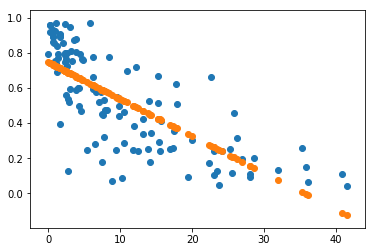

In [54]:
plt.scatter(X.agr,y)
plt.scatter(X.agr,fit.predict(X))

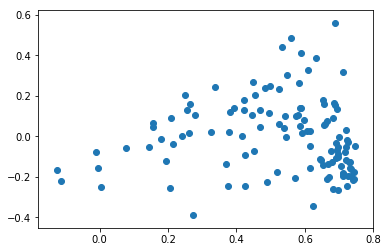

In [55]:
plt.scatter(fit.predict(X),fit.predict(X) - y['internet_users'])

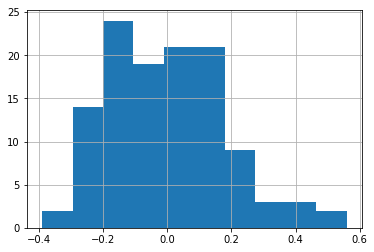

In [56]:
(fit.predict(X) - y['internet_users']).hist()

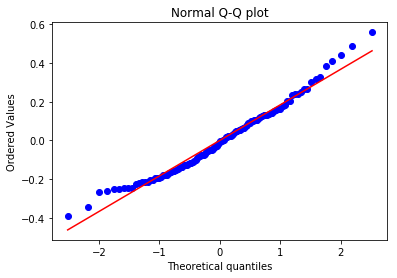

In [57]:
stats.probplot(fit.predict(X) - y['internet_users'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

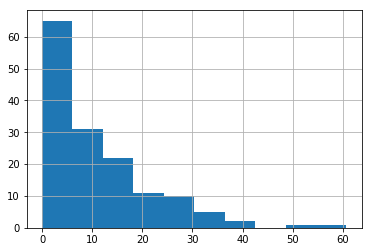

In [58]:
df.agr.hist()

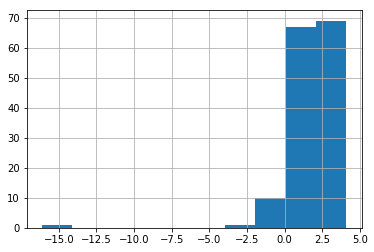

In [61]:
# Try log plot

df['agr']=df['agr'].replace(0,0.0000001)
np.log(df.agr).hist()

0.29798671287924


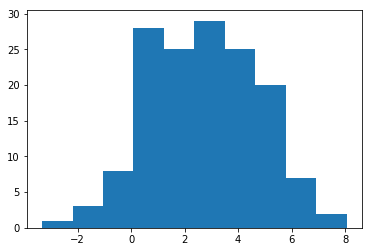

In [62]:
# Try boxcox

from scipy import stats

lamb=stats.boxcox_normmax(df.agr)
print(lamb)
y_t=(np.power(df.agr,lamb)-1)/lamb

plt.hist(y_t);

In [63]:
df_train['agr'] = y_t

/Users/nazim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
# Restandardise after transformation

# Standardise the data by compressing it between 0 and 1.

scaler = MinMaxScaler()
scaler.fit(df_train)
df_train_scaled = pd.DataFrame(scaler.transform(df_train))
df_train_scaled.columns = df_train.columns
df_train_scaled.index = df_train.index

df_train_scaled.head()


# Standardide the test data by transforming using the fit from the train data.

df_test_scaled = pd.DataFrame(scaler.transform(df_test))
df_test_scaled.columns = df_test.columns
df_test_scaled.index = df_test.index

df_test_scaled.head()

y_test = df_test_scaled.internet_users
X_test = df_test_scaled.drop(columns=['internet_users'])


In [66]:


y, X = patsy.dmatrices('internet_users ~ agr', data=df_train_scaled, return_type="dataframe")

model = sm.OLS(y, X)
fit = model.fit()

fit.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         internet_users   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     206.7
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           1.56e-27
Time:                        13:48:15   Log-Likelihood:                 35.290
No. Observations:                 118   AIC:                            -66.58
Df Residuals:                     116   BIC:                            -61.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2172      0.051     23.670      0.000       1.115       1.319
agr           -1.1765      0.082    -14.377      0.000      -1.339      -1.014
==============================================================================
Omnibus:                        5.003   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                4.875
Skew:                          -0.322   Prob(JB):                       0.0874
Kurtosis:                       3.760   Cond. No.                         6.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

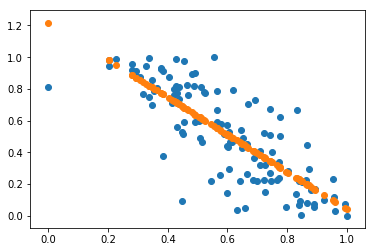

In [67]:
plt.scatter(X.agr,y)
plt.scatter(X.agr,fit.predict(X))

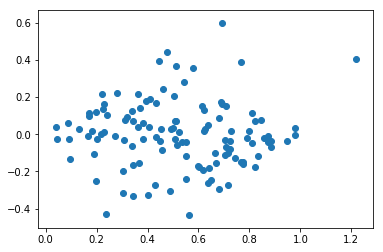

In [68]:
plt.scatter(fit.predict(X),fit.predict(X) - y['internet_users'])

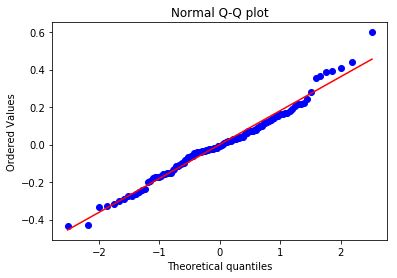

In [69]:
stats.probplot(fit.predict(X) - y['internet_users'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [70]:
y, X = patsy.dmatrices('internet_users ~ gdp_per_capita', data=df_train_scaled, return_type="dataframe")

model = sm.OLS(y, X)
fit = model.fit()

fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         internet_users   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     151.8
Date:                Fri, 12 Oct 2018   Prob (F-statistic):           8.20e-23
Time:                        13:48:17   Log-Likelihood:                 24.290
No. Observations:                 118   AIC:                            -44.58
Df Residuals:                     116   BIC:                            -39.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3143      0.025     12.754      0.000       0.265       0.363
gdp_per_capita     1.2219      0.099     12.321      0.000       1.025       1.418
==============================================================================
Omnibus:                        1.015   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.640
Skew:                          -0.157   Prob(JB):                        0.726
Kurtosis:                       3.177   Cond. No.                         5.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

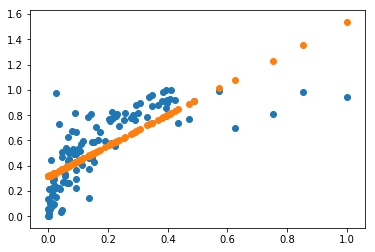

In [71]:
plt.scatter(X.gdp_per_capita,y)
plt.scatter(X.gdp_per_capita,fit.predict(X))

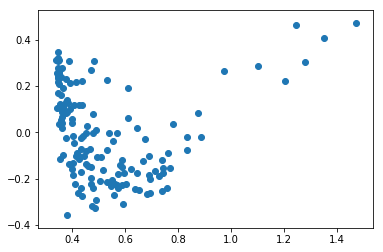

In [68]:
plt.scatter(fit.predict(X),fit.predict(X) - y['internet_users'])

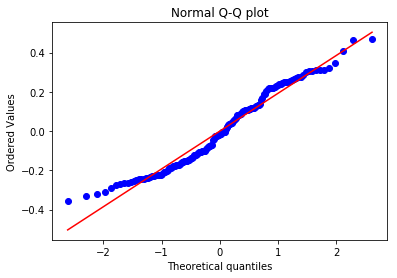

In [69]:
stats.probplot(fit.predict(X) - y['internet_users'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

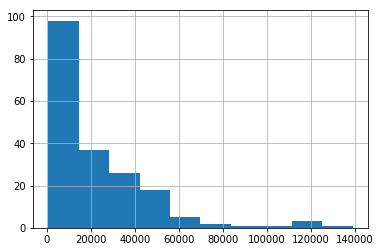

In [70]:
df.gdp_per_capita.hist()

0.14454432533690276


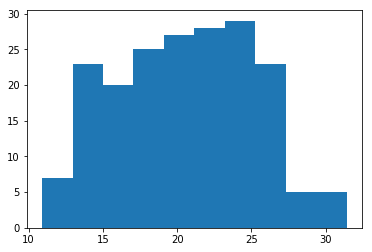

In [71]:
# Try boxcox

from scipy import stats

lamb=stats.boxcox_normmax(df.gdp_per_capita)
print(lamb)
y_t=(np.power(df.gdp_per_capita,lamb)-1)/lamb

plt.hist(y_t);

In [72]:
df_train['gdp_per_capita'] = y_t

# Standardise the data by compressing it between 0 and 1.

scaler = MinMaxScaler()
scaler.fit(df_train)
df_train_scaled = pd.DataFrame(scaler.transform(df_train))
df_train_scaled.columns = df_train.columns
df_train_scaled.index = df_train.index

df_train_scaled.head()

/Users/nazim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,internet_users,agr,gdp_per_capita,border_internet_scaled,pop_below_pov
Country,,,,,
Zimbabwe,0.241265,0.612907,0.148876,0.399974,0.876364
Moldova,0.734099,0.608225,0.296288,0.566217,0.116364
Turkmenistan,0.172888,0.521616,0.514238,0.196744,0.002424
Thailand,0.480443,0.536523,0.511964,0.400558,0.087273
Senegal,0.248470,0.674112,0.173533,0.110695,0.566061


In [73]:
y, X = patsy.dmatrices('internet_users ~ gdp_per_capita', data=df_train_scaled, return_type="dataframe")

model = sm.OLS(y, X)
fit = model.fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         internet_users   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     544.5
Date:                Thu, 11 Oct 2018   Prob (F-statistic):           6.10e-52
Time:                        17:31:26   Log-Likelihood:                 92.301
No. Observations:                 153   AIC:                            -180.6
Df Residuals:                     151   BIC:                            -174.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0157      0.024      0.652      0.515      -0.032       0.063
gdp_per_capita     1.0941      0.047     23.334      0.000       1.001       1.187
==============================================================================
Omnibus:                        5.277   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.827
Skew:                          -0.373   Prob(JB):                       0.0895
Kurtosis:                       3.448   Cond. No.                         5.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

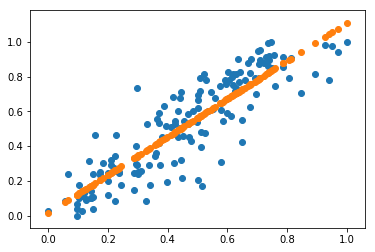

In [74]:
plt.scatter(X.gdp_per_capita,y)
plt.scatter(X.gdp_per_capita,fit.predict(X))

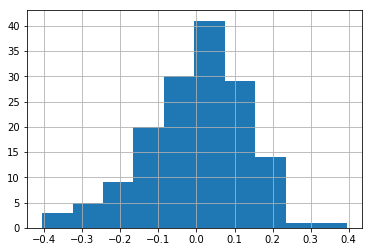

In [75]:
(y['internet_users']-fit.predict(X)).hist()

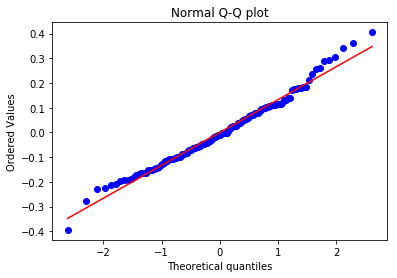

In [76]:
stats.probplot(fit.predict(X) - y['internet_users'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [1240]:
y, X = patsy.dmatrices('internet_users ~ border_internet_scaled', data=df_train_scaled, return_type="dataframe")

model = sm.OLS(y, X)
fit = model.fit()

fit.summary()

# Omnibus for this feature is already good.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         internet_users   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     90.05
Date:                Wed, 10 Oct 2018   Prob (F-statistic):           4.84e-17
Time:                        22:00:43   Log-Likelihood:                 11.244
No. Observations:                 153   AIC:                            -18.49
Df Residuals:                     151   BIC:                            -12.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.1544      0.043      3.631      0.000       0.070       0.238
border_internet_scaled     0.7218      0.076      9.490      0.000       0.572       0.872
==============================================================================
Omnibus:                        1.799   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.407   Jarque-Bera (JB):                1.698
Skew:                           0.257   Prob(JB):                        0.428
Kurtosis:                       2.949   Cond. No.                         5.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

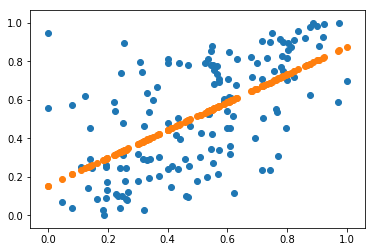

In [1241]:
plt.scatter(X.border_internet_scaled,y)
plt.scatter(X.border_internet_scaled,fit.predict(X))

In [1242]:
y, X = patsy.dmatrices('internet_users ~ pop_below_pov', data=df_train_scaled, return_type="dataframe")

model = sm.OLS(y, X)
fit = model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         internet_users   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 10 Oct 2018   Prob (F-statistic):           2.38e-19
Time:                        22:00:43   Log-Likelihood:                 16.576
No. Observations:                 153   AIC:                            -29.15
Df Residuals:                     151   BIC:                            -23.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7885      0.031     25.067      0.000       0.726       0.851
pop_below_pov    -0.8722      0.084    -10.366      0.000      -1.038      -0.706
==============================================================================
Omnibus:                        2.912   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.233   Jarque-Bera (JB):                2.478
Skew:                          -0.204   Prob(JB):                        0.290
Kurtosis:                       2.528   Cond. No.                         5.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

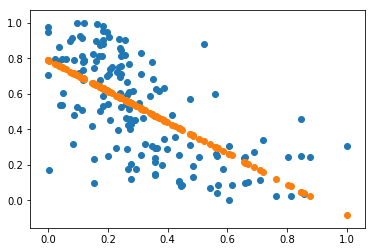

In [1243]:
plt.scatter(X.pop_below_pov,y)
plt.scatter(X.pop_below_pov,fit.predict(X))

In [1244]:
# Standardise the data by compressing it between 0 and 1.

scaler = MinMaxScaler()
scaler.fit(df_train)
df_train_scaled = pd.DataFrame(scaler.transform(df_train))
df_train_scaled.columns = df_train.columns
df_train_scaled.index = df_train.index

df_train_scaled.head()


# Standardide the test data by transforming using the fit from the train data.

df_test_scaled = pd.DataFrame(scaler.transform(df_test))
df_test_scaled.columns = df_test.columns
df_test_scaled.index = df_test.index

df_test_scaled.head()

y_train = df_train_scaled.internet_users
X_train = df_train_scaled.drop(columns=['internet_users'])

y_test = df_test_scaled.internet_users
X_test = df_test_scaled.drop(columns=['internet_users'])


In [1304]:
# Import in the data and only take features which we have selected. Drop nans and split into training and test data.

with open("initial_df.pkl", 'rb') as picklefile: 
    df = pickle.load(picklefile)
  
df.loc['Hong Kong']['internet_users'] = 6000000.0
df.loc['Taiwan']['internet_users'] = 20600000.0
df.loc['West Bank']['internet_users'] = 2600000.0
df.loc['European Union']['internet_users'] = 398000000.0
df.loc['Iran']['internet_users'] = 36000000.0
df.loc['Vietnam']['internet_users'] = 49700000.0
df.loc['Congo, Democratic Republic of the']['internet_users'] = 3000000
df.loc['Laos']['internet_users'] = 1300000



df['internet_users'] = df['internet_users']/df['population']
df = df[['internet_users','agr','gdp_per_capita', 'border_internet_scaled', 'pop_below_pov']]


In [1305]:
# Manually filling nans for population below poverty

df.loc['Australia']['pop_below_pov'] = 13.13
df.loc['Antigua and Barbuda']['pop_below_pov'] = 22.0
df.loc['Bahrain']['pop_below_pov'] = 80000.0/1400000.0
df.loc['Barbados']['pop_below_pov'] = 13.9
df.loc['Brunei']['pop_below_pov'] = 1000/423196.0
df.loc['British Virgin Islands']['pop_below_pov'] = 22.0
df.loc['Cayman Islands']['pop_below_pov'] = 1.9
df.loc['Cyprus']['pop_below_pov'] = 16.0
df.loc['Finland']['pop_below_pov'] = 6.0
df.loc['Guernsey']['pop_below_pov'] = 20.0
df.loc['Iceland']['pop_below_pov'] = 8.0
df.loc['Korea, North']['pop_below_pov'] = 40.0
df.loc['Kuwait']['pop_below_pov'] = 7.0
df.loc['Libya']['pop_below_pov'] = 40.0
df.loc['Liechtenstein']['pop_below_pov'] = 10.0
df.loc['Luxembourg']['pop_below_pov'] = 15.0
df.loc['Macau']['pop_below_pov'] = 10.0
df.loc['Marshall Islands']['pop_below_pov'] = 30.0
df.loc['Monaco']['pop_below_pov'] = 0.0
df.loc['Montserrat']['pop_below_pov'] = 25.0
df.loc['Nauru']['pop_below_pov'] = 24.0
df.loc['New Zealand']['pop_below_pov'] = 15.0
df.loc['Northern Mariana Islands']['pop_below_pov'] = 50.0
df.loc['Norway']['pop_below_pov'] = 7.5
df.loc['Puerto Rico']['pop_below_pov'] = 43.0
df.loc['Qatar']['pop_below_pov'] = 0.0
df.loc['Saint Kitts and Nevis']['pop_below_pov'] = 20.0
df.loc['Saint Lucia']['pop_below_pov'] = 15.0
df.loc['Saint Vincent and the Grenadines']['pop_below_pov'] = 20.0
df.loc['Samoa']['pop_below_pov'] = 18.8
df.loc['Saudi Arabia']['pop_below_pov'] = 12.7
df.loc['Singapore']['pop_below_pov'] = 20.0
df.loc['Solomon Islands']['pop_below_pov'] = 12.7
df.loc['Somalia']['pop_below_pov'] = 60.0
df.loc['Vanuatu']['pop_below_pov'] = 12.7


In [1306]:
df = df.dropna()
df['agr']=df['agr'].replace(0,0.0000001)
df_train,df_test = train_test_split(df, test_size=0.2, random_state = 2)

In [1307]:
# Standardise the data by compressing it between 0 and 1.

scaler = MinMaxScaler()
scaler.fit(df_train)
df_train_scaled = pd.DataFrame(scaler.transform(df_train))
df_train_scaled.columns = df_train.columns
df_train_scaled.index = df_train.index

df_train_scaled.head()


# Standardide the test data by transforming using the fit from the train data.

df_test_scaled = pd.DataFrame(scaler.transform(df_test))
df_test_scaled.columns = df_test.columns
df_test_scaled.index = df_test.index

df_test_scaled.head()

y_test = df_test_scaled.internet_users
X_test = df_test_scaled.drop(columns=['internet_users'])


In [1308]:
y, X = patsy.dmatrices('internet_users ~ gdp_per_capita + agr + border_internet_scaled + pop_below_pov', data=df_train_scaled, return_type="dataframe")

model = sm.OLS(y, X)
fit = model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         internet_users   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     119.5
Date:                Wed, 10 Oct 2018   Prob (F-statistic):           2.61e-45
Time:                        22:19:05   Log-Likelihood:                 85.595
No. Observations:                 153   AIC:                            -161.2
Df Residuals:                     148   BIC:                            -146.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.5227      0.042     12.302      0.000       0.439       0.607
gdp_per_capita             0.5014      0.082      6.142      0.000       0.340       0.663
agr                       -0.4741      0.078     -6.070      0.000      -0.628      -0.320
border_internet_scaled     0.2287      0.055      4.126      0.000       0.119       0.338
pop_below_pov             -0.3673      0.067     -5.453      0.000      -0.500      -0.234
==============================================================================
Omnibus:                        1.359   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.507   Jarque-Bera (JB):                1.007
Skew:                          -0.181   Prob(JB):                        0.604
Kurtosis:                       3.165   Cond. No.                         9.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.12247649072288168


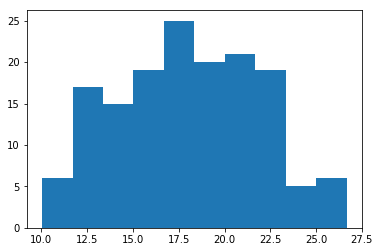

In [1309]:
# Transform gdp_per_capita only

from scipy import stats



lamb=stats.boxcox_normmax(df_train.gdp_per_capita)
print(lamb)
gdp_train =(np.power(df_train.gdp_per_capita,lamb)-1)/lamb
gdp_test = (np.power(df_test.gdp_per_capita,lamb)-1)/lamb

plt.hist(gdp_train);

In [1310]:
df_train.loc[:,'gdp_per_capita'] = gdp_train.copy()
df_test.loc[:,'gdp_per_capita'] = gdp_test.copy()

/Users/nazim/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [1311]:
# Standardise the data by compressing it between 0 and 1.

scaler = MinMaxScaler()
scaler.fit(df_train)
df_train_scaled = pd.DataFrame(scaler.transform(df_train))
df_train_scaled.columns = df_train.columns
df_train_scaled.index = df_train.index

df_train_scaled.head()


# Standardide the test data by transforming using the fit from the train data.

df_test_scaled = pd.DataFrame(scaler.transform(df_test))
df_test_scaled.columns = df_test.columns
df_test_scaled.index = df_test.index

df_test_scaled.head()

y_test = df_test_scaled.internet_users
X_test = df_test_scaled.drop(columns=['internet_users'])


In [77]:
y, X = patsy.dmatrices('internet_users ~ gdp_per_capita+ agr + border_internet_scaled + pop_below_pov', data=df_train_scaled, return_type="dataframe")

model = sm.OLS(y, X)
fit = model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         internet_users   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     153.5
Date:                Thu, 11 Oct 2018   Prob (F-statistic):           1.29e-51
Time:                        17:31:50   Log-Likelihood:                 100.84
No. Observations:                 153   AIC:                            -191.7
Df Residuals:                     148   BIC:                            -176.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.1176      0.107      1.102      0.272      -0.093       0.329
gdp_per_capita             0.8600      0.111      7.759      0.000       0.641       1.079
agr                       -0.0513      0.105     -0.487      0.627      -0.259       0.157
border_internet_scaled     0.1642      0.053      3.086      0.002       0.059       0.269
pop_below_pov             -0.1637      0.065     -2.512      0.013      -0.293      -0.035
==============================================================================
Omnibus:                        6.745   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.363
Skew:                          -0.448   Prob(JB):                       0.0415
Kurtosis:                       3.442   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1313]:
# Get X and y from the training data

y = df_train_scaled.internet_users
X = df_train_scaled.drop(columns=['internet_users'])

y_test = df_test_scaled.internet_users
X_test = df_test_scaled.drop(columns=['internet_users'])

0.08107412157422249
0.017703672832573875
0.01932634816491922
0.026893669548636995
0.6581351603404398


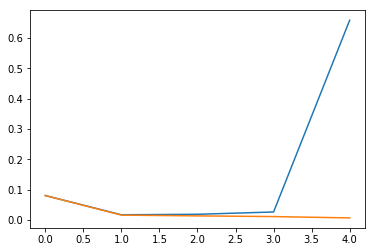

In [1314]:
# Looping over different polynomial values to find degree with best mean squared error and r2 values. 
# We found that a linear combination is the best


mse_degree = []
train_degree = []

for i in range(0,5):
    
    # Cross validation
    poly = PolynomialFeatures(degree=i)
    X2 = poly.fit_transform(X)
    reg = LinearRegression()
    scores = cross_val_score(reg, X2, y, cv=10, scoring='neg_mean_squared_error')   
    mse_degree.append(np.mean(-scores))
    print(np.mean(-scores))
    
    # Only on one training
    reg.fit(X2,y)
    training_error = mean_squared_error(y, reg.predict(X2))
    train_degree.append(training_error)
       
plt.plot(mse_degree)
plt.plot(train_degree)

# Best result from linear model( we can try regulari)

In [1315]:
# Perform regularization with degree 1

from sklearn.cross_validation import KFold
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline


all_scores=[]
#alphas= np.linspace(0.0001,0.01,11)
alphas = [0,0.001,0.01,1,10,100]
degree = 2

for alpha in alphas:
    
    est = make_pipeline(PolynomialFeatures(degree), ElasticNet(alpha=alpha))
    scores = cross_val_score(est, X, y, cv=10, scoring='neg_mean_squared_error')
    print(alpha)
    print(np.mean(-scores))
    
    
# We don't need regularization here

0
0.01932828760439487
0.001
0.01764890991353697
0.01
0.018451322413984894
1
0.08107412157422249
10
0.08107412157422249
100
0.08107412157422249


/Users/nazim/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:250: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/nazim/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/nazim/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nazim/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:250: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/Users

In [1316]:
reg = LinearRegression()
fit = reg.fit(X,y)

sklearn.metrics.r2_score(y_test,fit.predict(X_test))

0.7893190777270175

In [1317]:
fit.predict(X_test)

array([ 0.70129896,  0.87471177,  0.66515254,  0.68683667,  0.47804109,
        0.53481034,  0.90376128,  0.36344767,  0.69992419,  0.43685381,
        0.33885518,  0.03697679,  0.31740961,  0.66422693,  0.58224445,
        0.35313192,  0.40056691,  0.62877801,  0.13618246,  0.8367692 ,
        0.59948913,  0.76707958,  0.7926305 ,  0.55547532,  0.4163148 ,
        0.30080651,  0.62186679,  0.76901808,  0.25237565,  0.6251103 ,
        0.25651877,  0.74097864,  0.19730709,  0.68057787,  0.25004316,
       -0.07616296,  0.24289276,  0.7520236 ,  0.72826199])